In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore") 

# Input data files are available in the read-only "../input/" directory
# For example, running this will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# other libraries, dependencies, ect....



### Loading and Initial Data Exploration

In [8]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132,24,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88,12,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120,28,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72,30,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52,48,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


Notes on data:

- id: standard ID value
- surgery: Yes or No of whether the horse in question received surgery
- age: Either Adult or Young
- hospital_number: number ID of hospital the horse attended
- rectal_temp: Temperature taken, details on to how self explanatory lol
- pulse: heart rate
- respiratory_rate: breathing rate
- temp_of_extremities: Cool, Normal, or other
- peripheral pulse: Reduced, Normal, or other
- mucous_membrane: color of mucous membrane
- capillary_refill_time: less then 3 sec, more then 3 sec, other
- pain: expression of amount of pain horse could be in
- peristalsis: hypomotile, absent, other. (apparently peristalsis is the wave like muscle contraction of the digestive tract, who knew! Vets in this case I assume)
- abdominal_distention: Abdominal swelling
- nasogastric_tube: according to google: It is used by a vet to identify if there are any abnormal contents in the horse's stomach, and to administer fluids and some treatments directly into the stomach. 
- nasogastric_reflux: Fluid or gas build-up in the stomach
- nasogastric_reflux_ph: ph level of nasogastric fluid
- rectal_exam_feces: measure of feces during rectal exam
- abdomen: small, large, normal, ect...
- packed_cell_volume: score for composition of blood cells
- total_protein: number value
- abdomo_apperance: color of fluid
- abdomo_protein: number value
- surgical_lesion: true or false
- lesion_1: number value
- lesion_2: number value
- lesion_3: number value
- cp_data: true or false
- outcome: lived, died, euthanized

### Missing Data



<bound method NDFrame.head of nasogastric_tube         355
nasogastric_reflux       352
abdominal_distention     235
abdomen                  213
rectal_exam_feces        190
peripheral_pulse          60
abdomo_appearance         48
pain                      44
temp_of_extremities       39
mucous_membrane           21
peristalsis               20
capillary_refill_time      6
lesion_2                   0
lesion_1                   0
surgical_lesion            0
total_protein              0
lesion_3                   0
abdomo_protein             0
cp_data                    0
id                         0
packed_cell_volume         0
nasogastric_reflux_ph      0
surgery                    0
respiratory_rate           0
pulse                      0
rectal_temp                0
hospital_number            0
age                        0
outcome                    0
dtype: int64>

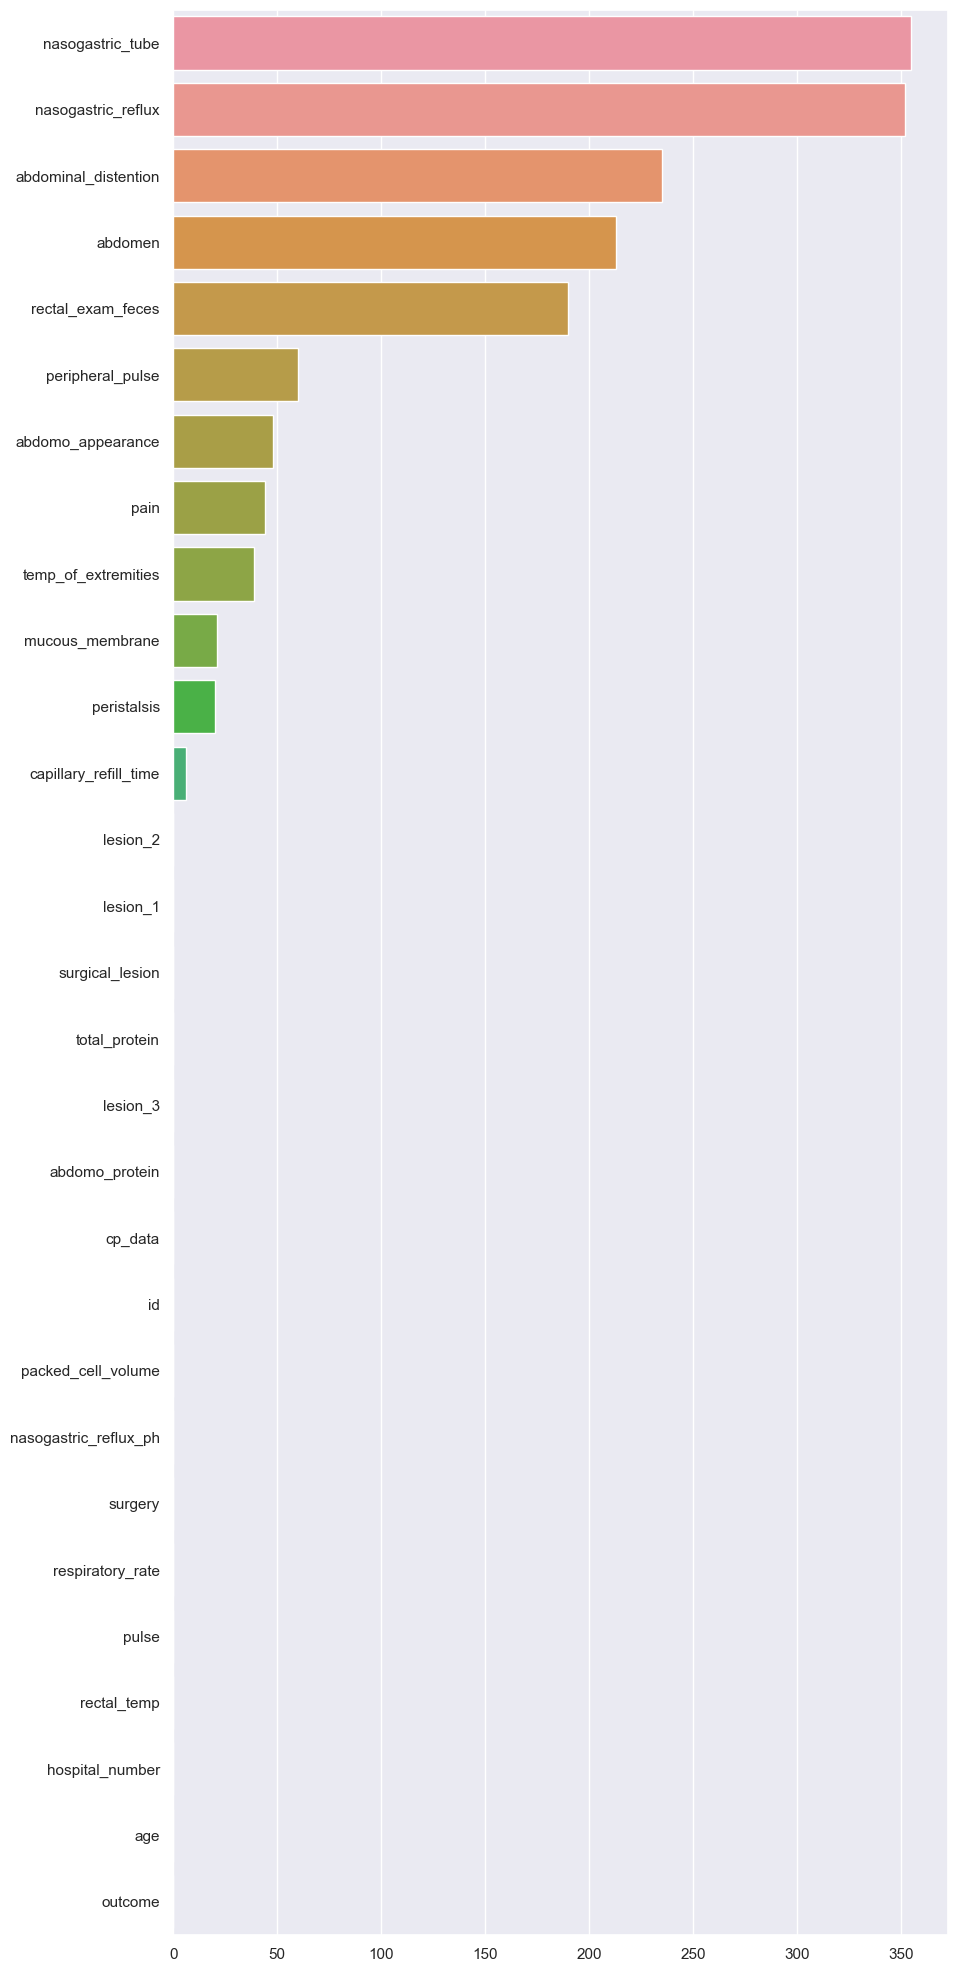

In [10]:
# Finding null/na values if there are any
plt.figure(figsize=(10,25))

null_vals = train_data.isna().sum().sort_values(ascending=False)
null_vals.head